In [2]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import array
import requests
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
from itertools import cycle, islice
from matplotlib import cm

In [3]:
audiofeature_path = "audiogeatures_df.csv"
audiofeature_dataframe = pd.read_csv(audiofeature_path)
audiofeature_dataframe


,Genre,Popularity,Loudness,Tempo,Duration_ms,Energy,Key,Instrumentalness,Speechiness,Valence,Danceability
0,acoustic,32.870000,-10.110900,114.696900,228303.930000,0.391407,4.880000,0.044732,0.042716,0.373236,0.572530
1,afrobeat,11.610000,-8.327720,117.995360,283232.810000,0.666441,5.480000,0.064342,0.089532,0.709910,0.644710
2,alt-rock,28.210000,-6.976280,127.182730,236444.230000,0.757670,5.030000,0.099953,0.053783,0.486831,0.481090
3,alternative,47.484848,-5.974818,126.097030,239391.636364,0.748455,5.393939,0.034448,0.048109,0.523559,0.548414
4,ambient,22.306122,-19.154490,106.545245,367560.755102,0.272592,4.887755,0.805911,0.048821,0.114077,0.318680
5,anime,19.230000,-4.721800,136.885510,249578.680000,0.812900,5.370000,0.026293,0.072381,0.515990,0.519410
6,black-metal,8.450000,-6.856930,121.910540,330475.990000,0.879955,5.220000,0.599640,0.087220,0.138371,0.215192
7,bluegrass,19.282828,-10.046899,127.651283,211836.565657,0.499737,5.878788,0.151874,0.039924,0.613212,0.543465
8,blues,22.040404,-9.825263,122.049869,230092.232323,0.511865,5.252525,0.059819,0.060846,0.617414,0.542444
9,bossanova,5.360000,-11.962980,113.918190,185147.950000,0.441168,5.380000,0.134576,0.058008,0.543790,0.543230


In [4]:
duration_ms_list = audiofeature_dataframe['Duration_ms'].tolist()
duration_ms_list
Int = 10000
s_list = [x / Int for x in duration_ms_list]
duration_s_list = [round(s) for s in s_list]
#duration_s_list

/Users/heesungshim/app/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


<function matplotlib.pyplot.show(*args, **kw)>

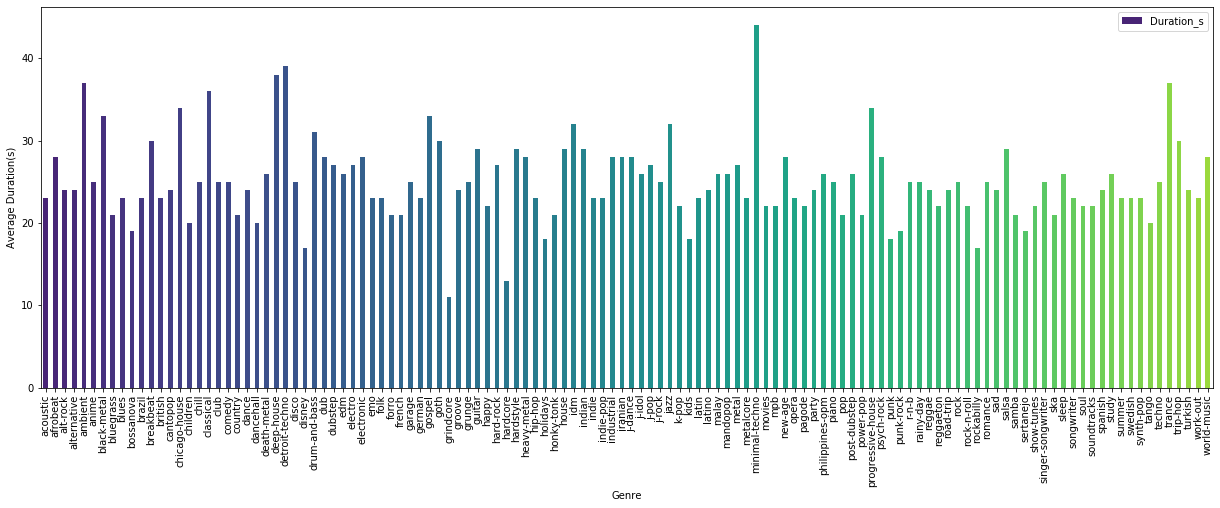

In [19]:
genre_duration = audiofeature_dataframe[["Genre","Duration_ms"]]
#grouped_regimen =regimen_and_MouseID.groupby(["Drug Regimen"])
#grouped_regimen=pd.DataFrame(grouped_regimen.count())
#grouped_regimen=grouped_regimen.sort_values("Timepoint",ascending =False)
genre_duration['Duration_s']= duration_s_list
genre_duration_s = genre_duration[["Genre","Duration_s"]]
#genre_duration_s.plot(kind="bar",figsize=(20,5))
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(genre_duration_s)))
#my_colors = [(n/10.0, n/20.0, 0.75) for n in range(len(genre_duration_s))]
#my_colors
#color = cm.inferno_r(np.linspace(0.1, 0.9, 130))
color = cm.viridis(np.linspace(0.1, 0.9, 130))
#color
ax = genre_duration_s.plot.bar(x='Genre', y='Duration_s', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Average Duration(s)")
plt.show




<function matplotlib.pyplot.show(*args, **kw)>

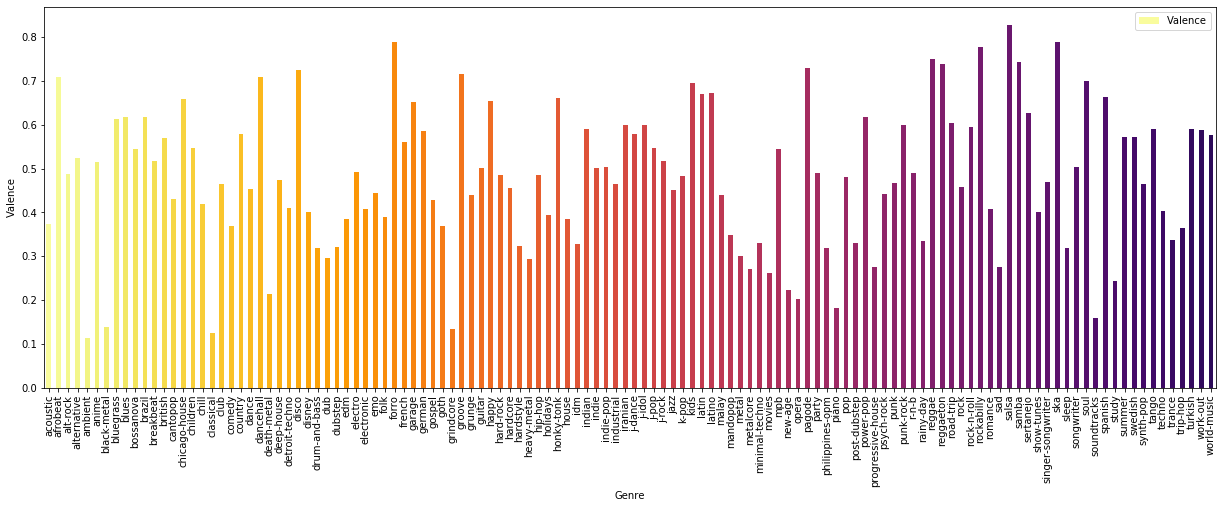

In [13]:
genre_population=audiofeature_dataframe[["Genre","Valence"]]
color = cm.inferno_r(np.linspace(0.01, 0.9, 130))
#color
ax = genre_population.plot.bar(x='Genre', y='Valence', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Valence")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

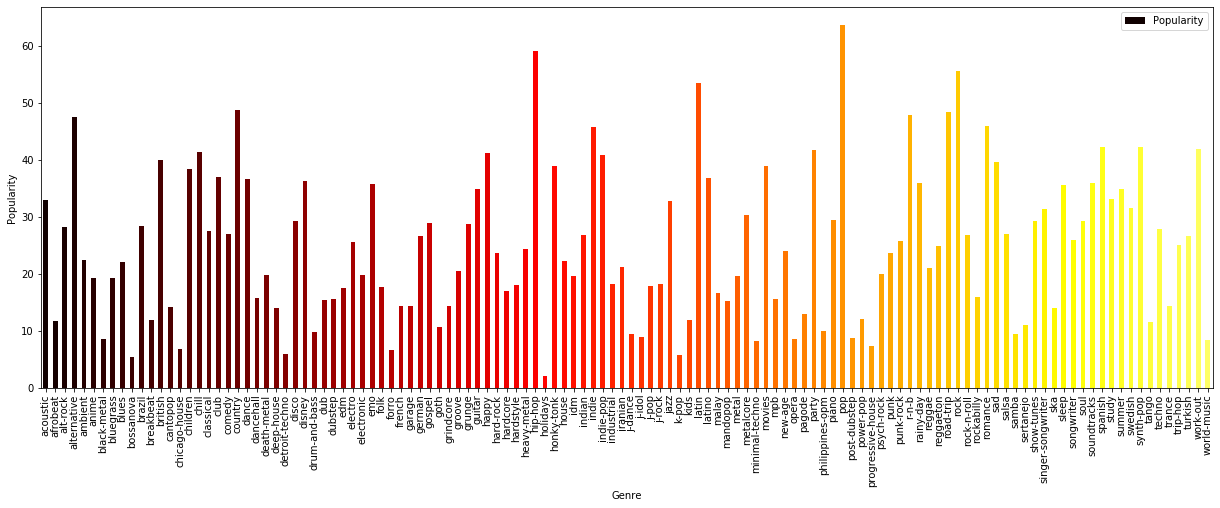

In [26]:
genre_population=audiofeature_dataframe[["Genre","Popularity"]]
color = cm.hot(np.linspace(0.01, 0.9, 130))
#color
ax = genre_population.plot.bar(x='Genre', y='Popularity', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Popularity")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

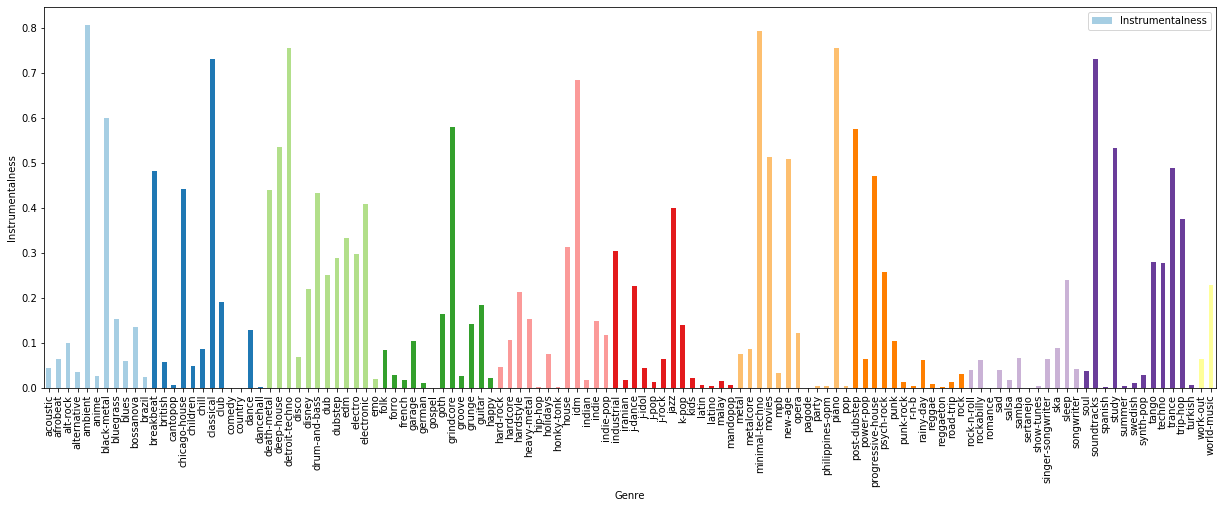

In [22]:
genre_population=audiofeature_dataframe[["Genre","Instrumentalness"]]
color = cm.Paired(np.linspace(0.01, 0.9, 130))
#color
ax = genre_population.plot.bar(x='Genre', y='Instrumentalness', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Instrumentalness")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

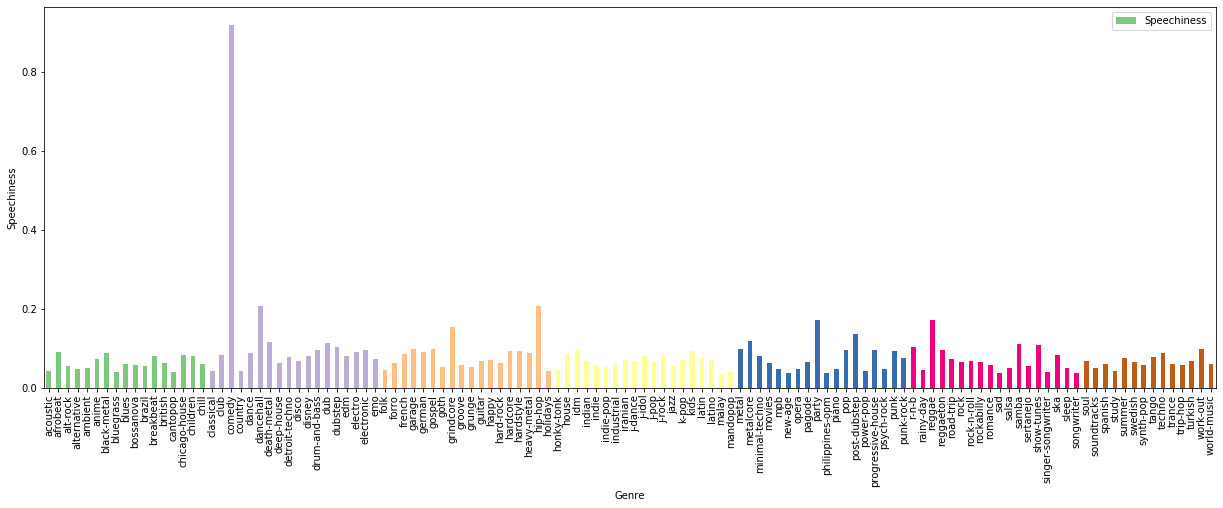

In [23]:
genre_population=audiofeature_dataframe[["Genre","Speechiness"]]
color = cm.Accent(np.linspace(0.01, 0.9, 130))
#color
ax = genre_population.plot.bar(x='Genre', y='Speechiness', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Speechiness")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

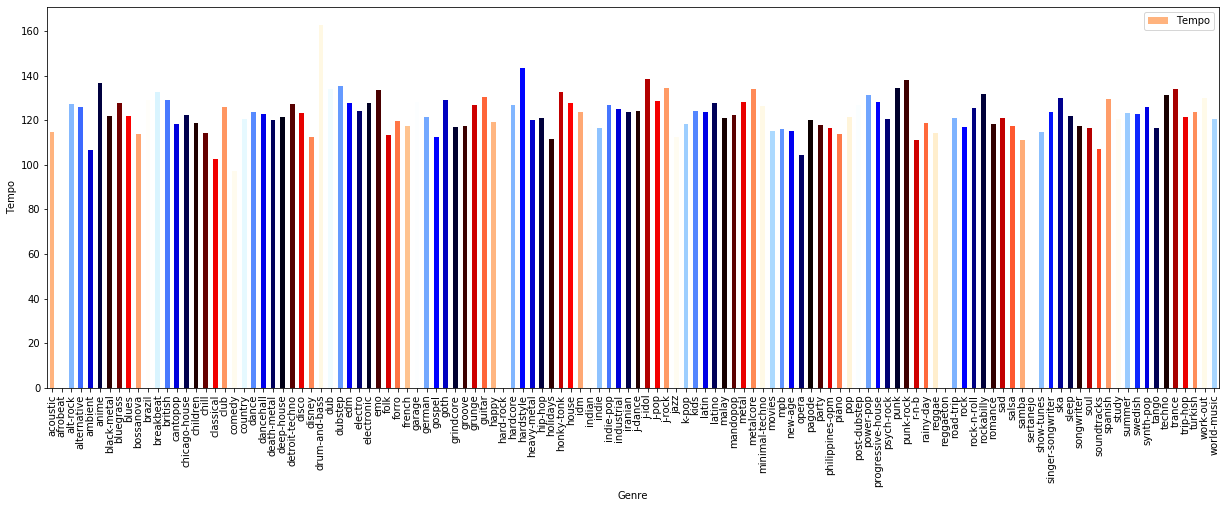

In [24]:
genre_population=audiofeature_dataframe[["Genre","Tempo"]]
color = cm.flag(np.linspace(0.01, 0.9, 130))
#color
ax = genre_population.plot.bar(x='Genre', y='Tempo', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Tempo")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

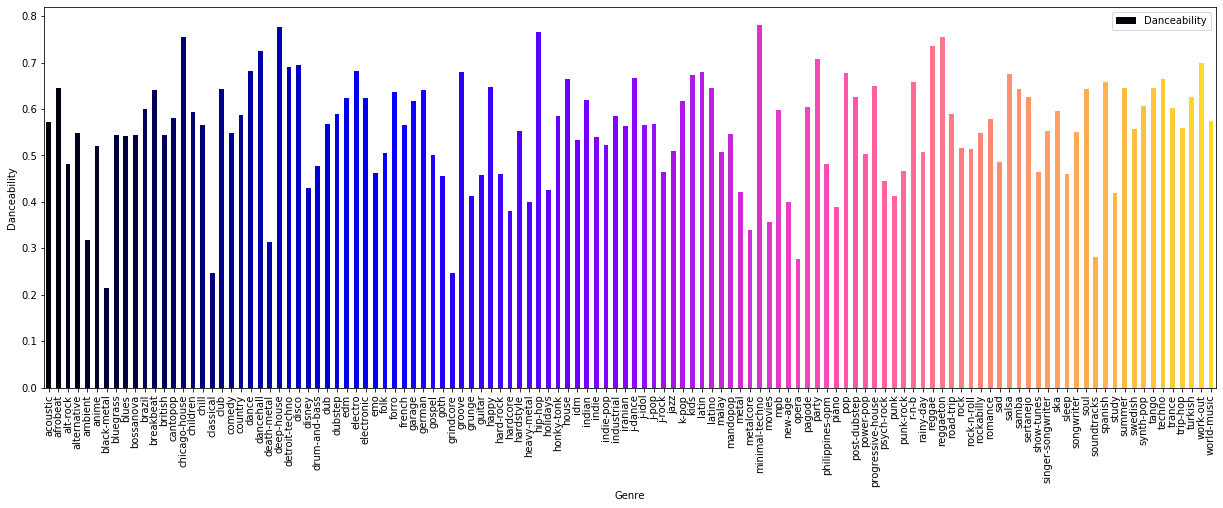

In [25]:
genre_population=audiofeature_dataframe[["Genre","Danceability"]]
color = cm.gnuplot2(np.linspace(0.01, 0.9, 130))
#color
ax = genre_population.plot.bar(x='Genre', y='Danceability', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Danceability")
plt.show